## Predicting Heart Disease Using Machine Learning
Using various Python based ML and Data Science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease, based on their medical attributes (from UCI heart-disease-dataset)

### Approach Framework:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### Problem Definition
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### Data Dictionary
Data is sourced from UCI Heart Disease - Kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### Evaluation
If we can reach >95% accuracy at predicitng whether or not a patient has heart disease during proof of concept, pursue the project

### Features
Data Dictionary {

This is information on our features in our data

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
7. thalach - maximum heart rate achieved
8. exang - exercise induced angina (1 = yes; 0 = no)
9. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
10. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
11. ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
12. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
13. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

}

## Preparing the tools
Data Analysis & Manipulation: Pandas, Matplotlib, NumPy 

<img src="desktop/sample_project/heart-disease-project/sklearn-cheat-sheet.png"/>

In [1]:
# Importing Tools
# Regular EDA (Exploratory Data Analysis) Plotting Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
#plots appear inside notebook

# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape
#rows,columns

(303, 14)

## Exploratory Data Analysis (EDA)
To find more about the data and become a subject matter expert on the dataset you are working with

EDA Checklist:
1. What questions are you trying to solve?
2. What kind of data do we have? How do we treat different types (numerical, int)?
3. What's missing from the data? How to deal with it?
4. Where are the outliers (nomalies)? Why should you care?
5. How can you add change / remove features to get more out of your data?

In [4]:
#Accessing target to find out how many of each class there are
df.target.value_counts()
# can also use df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Target, as defined in our data dictionary: 14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

This is a balanced classification problem, as we have a similar number in each

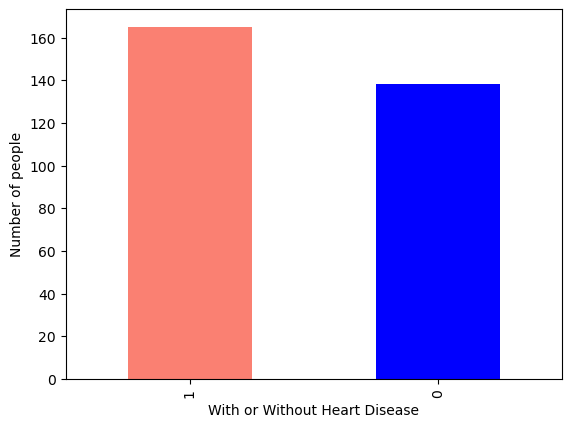

In [5]:
##Explain the data in a way that both we and others can understand. Visualisations.

df["target"].value_counts().plot(kind="bar",
                                 color=["salmon", "blue"],
                                 ylabel="Number of people",
                                 xlabel="With or Without Heart Disease"
                                );

In [6]:
#Looking at different info on our dataframe
#Refer to data dictionary above to understand the labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#More about our dataframe
#Numerical info about our columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing different columns

### Heat Disease Frequency according to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Male = 1

Female = 0

There is more male data

In [10]:
#Compare target colummn with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Based on our existing dataset, 72/96 women have heart disease, and 93/207 males have heart disease. From this, we can predict that 75% of women in our data will have heart disease, and 45% of males in our data will have heart disease.

Overall, we can infer that there is a 62.5% chance that someone will have heart disease.

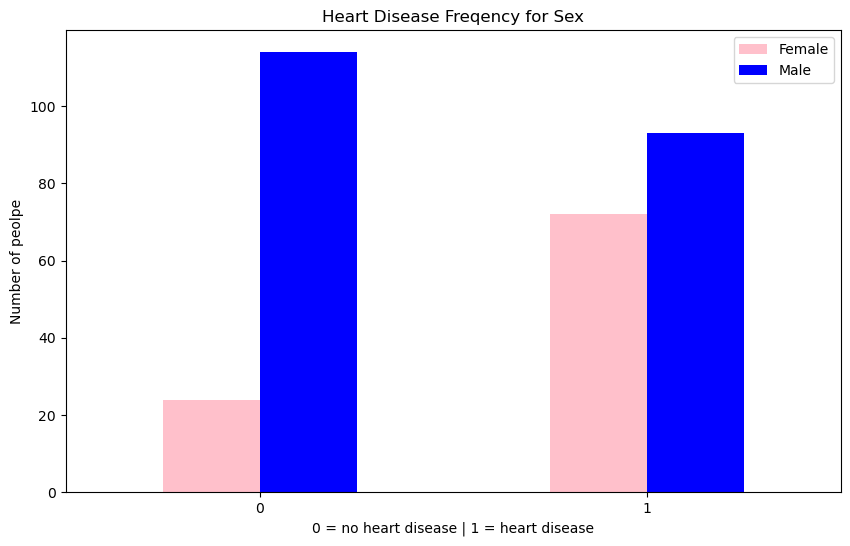

In [11]:
#Create a plot to make the data more visual
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["pink", "blue"],
                                   ylabel="Number of peolpe",
                                   xlabel="0 = no heart disease | 1 = heart disease",
                                   title="Heart Disease Freqency for Sex");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Comparing other independent variables to our target varibale:

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

Length = there is that many values in a column, makes it harder to use a bar graph. Perhaps use a scatter graph.

### Age vs Max Heart Rate for Heart Disease

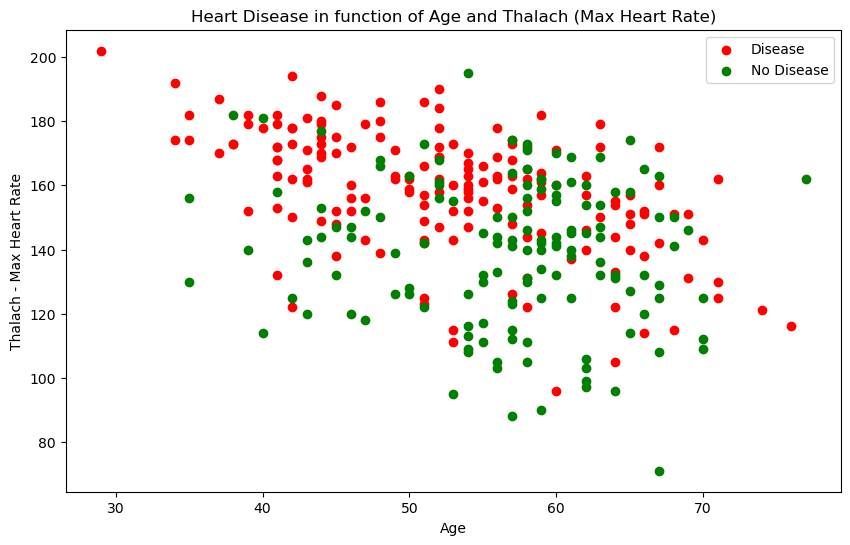

In [14]:
##Create a figure
plt.figure(figsize=(10,6))

##Create a scatter
#Create a subset of our data set where if target = 1,
#it will show the age columns with target equal to 1
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="red");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="green")

##Add some helpful information
plt.title("Heart Disease in function of Age and Thalach (Max Heart Rate)")
plt.xlabel("Age")
plt.ylabel("Thalach - Max Heart Rate")
plt.legend(["Disease", "No Disease"])

Very scattered. Need to use ML to find a pattern, but visually it looks like as someone gets older, the lower their heart rate.

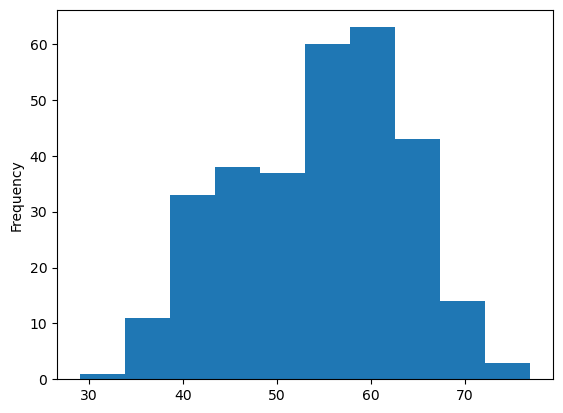

In [15]:
#Check the distribution (spread) of the age column with a histogram.
df.age.plot.hist();

This is a normal distribution, but slightly leaning towards the right.

### Heart Disease Frequency per Chest Pain type.
cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Remember, 0 = No heart disease. 1 = heart disease.

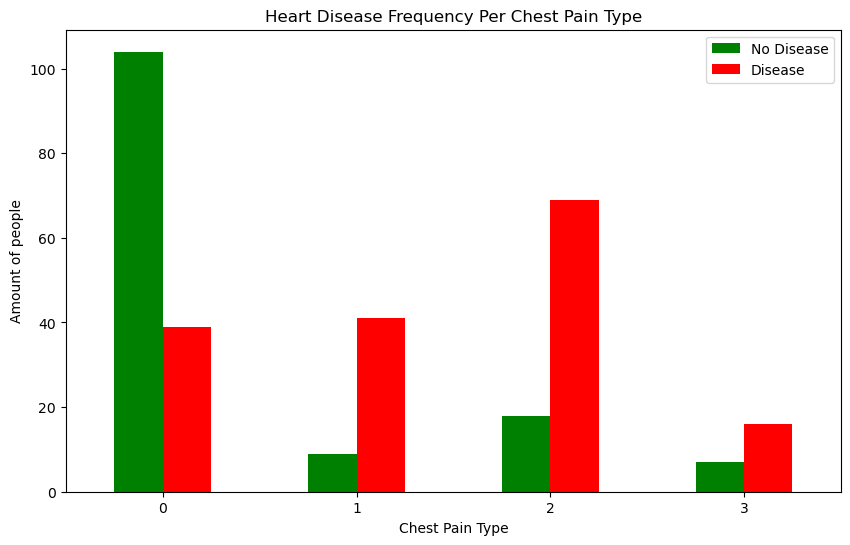

In [18]:
#Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                 color=["Green", "Red"]);

##Add info
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount of people")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
##Make a correlation Matrix
#Finds the relationships between each independent variable
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


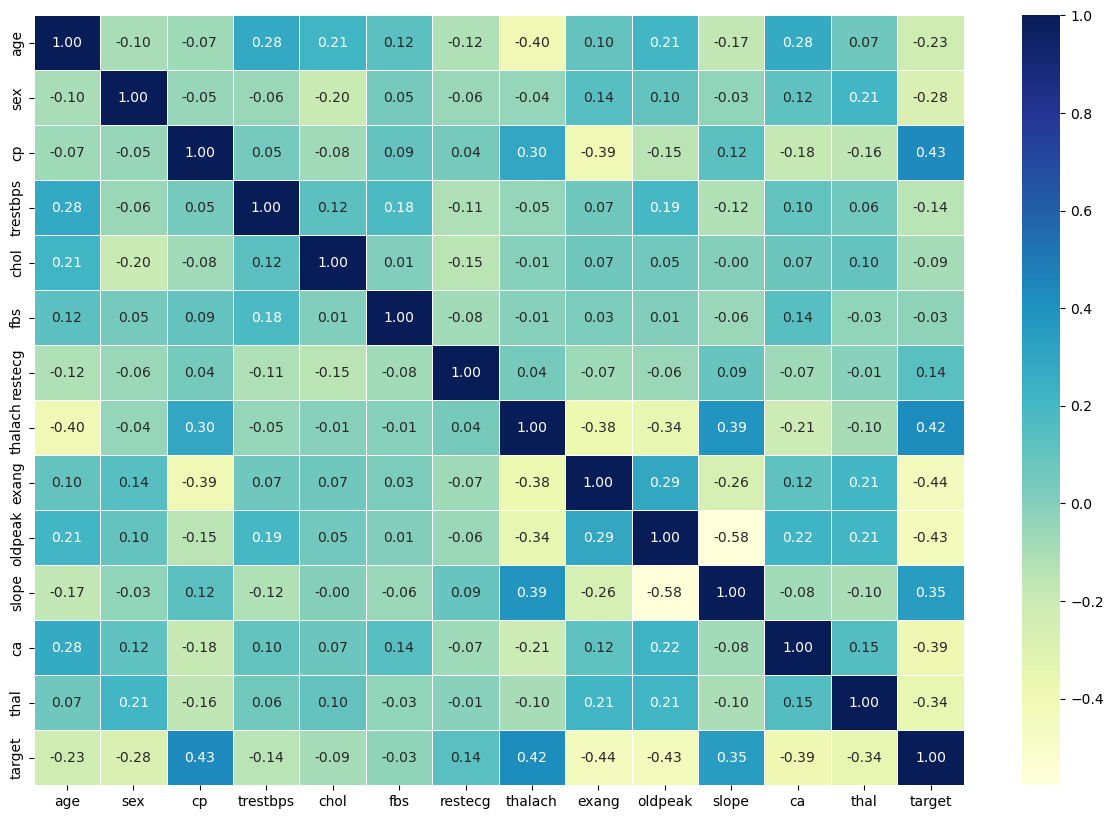

In [21]:
#Lets make this more visual using a heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

Positive correlation Example:
- Cp + target = 0.43 - positive correlations. Tells you how chest pain is related to the target column
- as cp type increase, target value increases (positive correlation)

Negative correlation Example:
- as exang decreases, target value decreases
- exang - exercise induced angina (1 = yes; 0 = no) --> Do you get heart pain when you exercise? 1=yes, 0=no
- If someone has chest pain during exercise, their chance of having heart disease decreases

## Modelling
### Time to build a predictive ML model to predict whether someone may have heart disease for future data

Answering our problem definition; Given clinical parameters about a patient, can we predict whether or not they have heart disease?

Evaluation Expections; If we can reach >95% accuracy at predicitng whether or not a patient has heart disease during proof of concept, pursue the project

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
## Split into train and test sets

#Set Random seed so we can reproduce results
np.random.seed(42)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


X_train has 242 rows

In [28]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

y_train has 242 rows for just the labels

### Build your machine learning model. This is a classificaiton problem.
- Train it to find patterns on training set
- Use these patterns on the test set
- Review ML map below

<img src="sklearn-cheat-sheet.png">

We will be using
- Logistic Regression (found when googling ML model classifiers)
- KNeighbors Classifier
- Ensemble Classifiers - RandomForestClassifier

In [29]:
#Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models : a dict of different sklearn
    machine learning models.
    X_train = training data (no labels)
    X_test = testing data (no labels)
    y_train = training labels
    y_train = testing labels
    """
    #Set Randomseed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/a/Desktop/sample_project/heart-disease-project/env-f/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Logistic Regression returns highest score

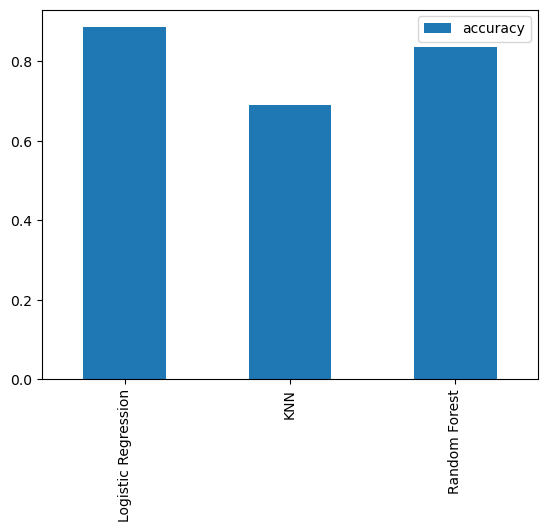

In [31]:
#Model Comparison; Making this visual

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Best algorithm for predicting heart disease: Logistic Regression

### Tuning Hyperparameters with  baseline models

Experiments:
- Hyperparameters tuning
- Feature Importance
- Confusion Matrix
- Cross Validation
- Precision
- Recall
- F1 Score
- Classification Report
- Receiver Operating Characteristic Curve (ROC Curve)
- Area Under the Curve (AUC)

### Hyperparameter Tuning (By Hand)
Google parameters for each model

In [32]:
##KNN
#Loop through set range
#create different models
#append these scores to our lists


train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Set up KNN Instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm on train sets
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on Test Data: 75.41


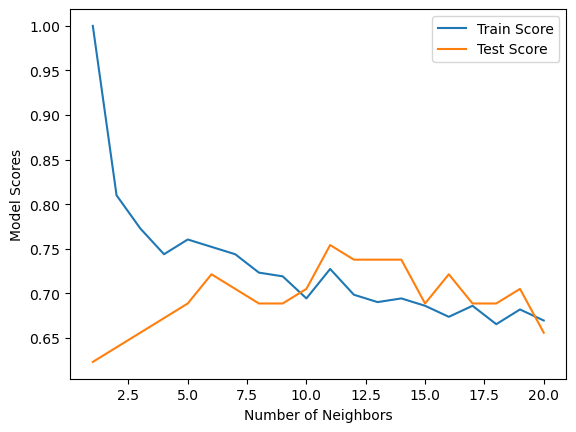

In [35]:
#Make this data more visual
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")

plt.xlabel("Number of Neighbors")
plt.ylabel("Model Scores")
plt.legend();

print(f'Maximum KNN Score on Test Data: {max(test_scores)*100:.2f}')

KNN of 11 yields the best score on the test dataset.

Even after improving n_neighbors from the default, 5, to 11, it still wouldnt be something we pursue as it falls behind our target of 95% accuracy.

### Tuning Using RandomizedSearchCV
Google what the best hyperparameters to tune are
- LogisticRegression()
- RandomForestClassifier()

Set up Hyperparameter Grids

In [36]:
##Creating a grid of hyperparameters to tune
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"]}

#Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}

Tune hyperparameter grids using RandomizedSearchCV

In [37]:
#Logistic Regression
#Random Seed
np.random.seed(42)

#Set up random hyperparameters
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

Check the best parameters

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

Evaluate on our test

In [39]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Achieved the same accuracy.
Can tune more hyperparameters.

Time to tune RandomForestClassifier

In [40]:
#Random Seed
np.random.seed(42)

#Set up random hyperparameters
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

Check the best parameters

In [41]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

Evaluate on our test

In [42]:
rs_rf.score(X_test, y_test)

0.8688524590163934

Accuracy score increased!

In [43]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Let's get specific with GridSearchCV

Since Logistic Regression had the best scores, we will focus on that model

In [44]:
#Different Hyperparameters for Logistic Regression
log_reg_grid = {"C" : np.logspace(-4,4,30),
               "solver" : ["liblinear"]}

#Set up grid hyperparameter search
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
#Check for best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
#Evaluate on our test
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [47]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Time to evaluate our tuned Machine Learning Classifier Beyond Accuracy
- ROC Curve
- AUC Score
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1 Score

We must start by making predictions:

In [48]:
y_preds = gs_log_reg.predict(X_test)

In [49]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

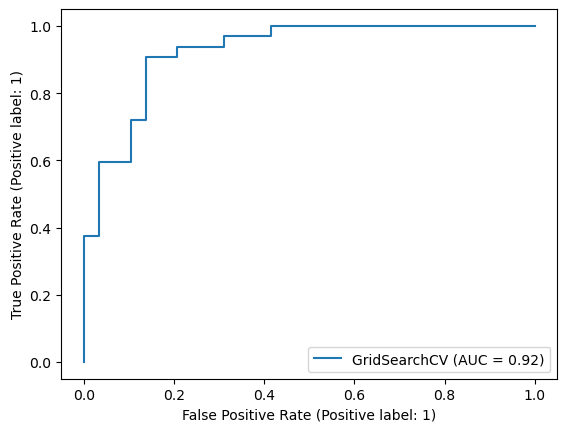

In [50]:
#ROC Curve and AUC Score
#Plot ROC Curve and calculate AUC
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

AUC of 0.92 edges close to a perfect model (being 1)

## Confustion Matrix

In [51]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


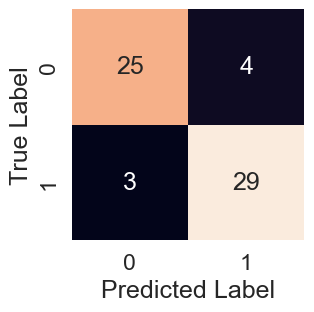

In [52]:
#Visualise the confusion matrix using seaborn
sns.set(font_scale=1.5)

#Function for future confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborns heatmap.
    """
    fix, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_conf_mat(y_test, y_preds)

Where our model is getting confused:
* 25 True Positives
* 4 False Positives
* 3 False Negatives
* 29 True Negatives

### Classification Report & Cross validated precision, recall, f1 score

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



This has only been done on one set of data, the test dataset.

Need to do a cross-validation score of precision, recall and f1

### Precision:
Proportion of positive identifications (has heart disease) which was actually correct. No false positives = 1.0

### Recall:
Proportion of actual positives which were correctly classified. No flase negatives = 1.0

### F1:
Combination of precision and recall

### Support:
Number of samples our data was tested on.

### Macro Average:
Average precision and f1 score between classes. Doesn't take class inbalance into account (defined by support).

### Weighted Average:
Weighted average percision and f1 score. Each metric is calculated with respect to how many samples there are in each class. Will favour the majoriy class. Will be a high value if one class out-performs another due to having more sampels (higher weight).

### Cross Validation using cross_val_score()

In [54]:
##Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
#Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [71]:
#Cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [66]:
#Cross validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [67]:
#Cross validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [70]:
#Cross validated f1-score
cv_f1 = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

### Visualise data into a graph

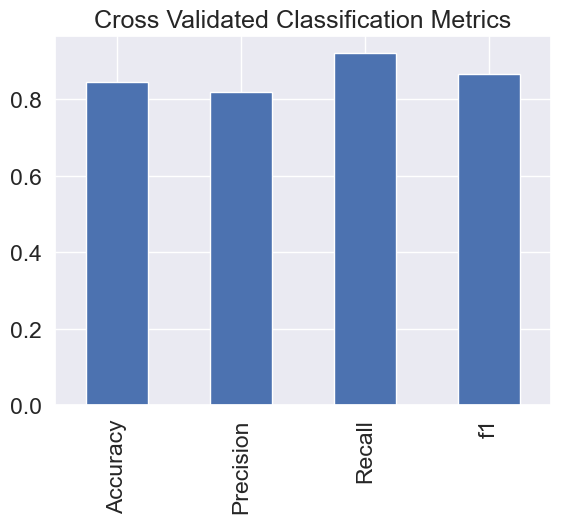

In [76]:
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "f1" : cv_f1},
                          index =[0])

cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics",
                     legend=False);

### Feature Importance
Another way of asking which features contributed most to the outcomes of the model?

How did they contribute?

In [77]:
#Fit an instance of logistic regression with best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [79]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train);

In [80]:
#Check coefficient (coef_)
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [81]:
#Match coef_ of features to columns
#Create a dictionary and zip together the columns and coef_
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

We have taken the coef array and the columns from our data frame, and mapped them to each other, matching the variable to the correct column.

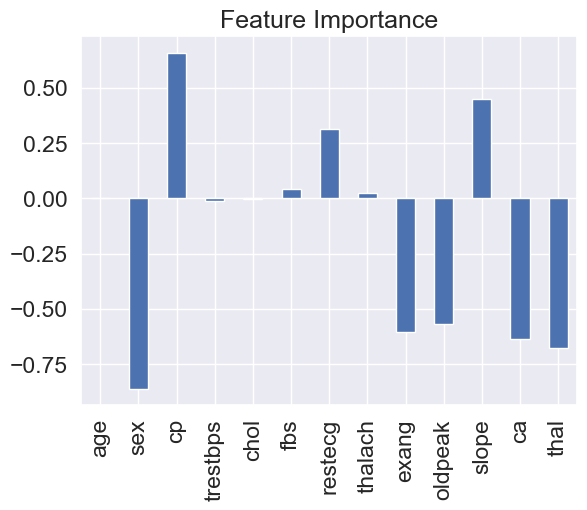

In [83]:
#Visualise Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

This is how much each feature contributes to the target variable.

Some are negative, some are positive (like in our correlation matrix).

- Strong negative correlation: Sex
- Strong positive correlation: slope
- Neutral: cholesterol

We might consider removing features which have no strong positive/negative correlation

In [85]:
#Sex is negatively correlated.
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


As the value for sex increases, the target value (ratio) decreases.

Female 3:1 ratio
Male 1:2 ratio

In [86]:
#Slope is positively correlated.
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

As slope increases, the target increases.

The more unhealthier the heart, the higher likelyhood of having heart disease.

## Evaluation / Summary

We didnt reach our evaluation metric of 95%. 
- Can we collect more data?
- Can we try a better model (CatBoost, XGBoost)?
- Can we impove the current models? test more hyperparameters?